In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import *
from numpy.polynomial.hermite import *
import scipy

from sympy import symbols, diff, exp, factorial, simplify, expand
import sympy as sp

# Etude préliminéaire : préparation des codes
## Calcul des polynômes d'Hermite

In [2]:
def phi(x):
    return(exp(-x**2/2))
def Hermite(n):
    P = (-1)**n*exp(X**2/2)*diff(phi(X),X,n)
    return(expand(simplify(P)))
X = sp.symbols('X')
for i in range(12):
    a=Hermite(i)
    print('L'+str(i),' : ',a)

L0  :  1
L1  :  X
L2  :  X**2 - 1
L3  :  X**3 - 3*X
L4  :  X**4 - 6*X**2 + 3
L5  :  X**5 - 10*X**3 + 15*X
L6  :  X**6 - 15*X**4 + 45*X**2 - 15
L7  :  X**7 - 21*X**5 + 105*X**3 - 105*X
L8  :  X**8 - 28*X**6 + 210*X**4 - 420*X**2 + 105
L9  :  X**9 - 36*X**7 + 378*X**5 - 1260*X**3 + 945*X
L10  :  X**10 - 45*X**8 + 630*X**6 - 3150*X**4 + 4725*X**2 - 945
L11  :  X**11 - 55*X**9 + 990*X**7 - 6930*X**5 + 17325*X**3 - 10395*X


In [3]:
def fac(n):
    if n<=1.:
        return 1.
    else:
        return n*fac(n-1)

In [4]:
def H0(x):
    return x*0.+1.
def H1(x):
    return x
def H2(x):
    return (x**2.-1.)/np.sqrt(2.)
def H3(x):
    return (x**3.-3.*x)/np.sqrt(6.)
def H4(x):
    return (x**4.-6.*x**2.+3.)/np.sqrt(24.)
def H5(x):
    return (x**5.-10.*x**3.+15.*x)/np.sqrt(120.)
def H6(x):
    return (x**6.-15.*x**4.+45.*x**2.-15.)/np.sqrt(720.)
def H7(x):
    return (x**7.-21.*x**5.+105.*x**3.-105.*x)/np.sqrt(5040.)
def H8(X):
    return (X**8 - 28*X**6 + 210*X**4 - 420*X**2 + 105)/np.sqrt(fac(8.))
def H9(X):
    return (X**9 - 36*X**7 + 378*X**5 - 1260*X**3 + 945*X)/np.sqrt(fac(9.))
def H10(X):
    return (X**10 - 45*X**8 + 630*X**6 - 3150*X**4 + 4725*X**2 - 945)/np.sqrt(fac(10.))
def H11(X):
    return (X**11 - 55*X**9 + 990*X**7 - 6930*X**5 + 17325*X**3 - 10395*X)/np.sqrt(fac(11.))
def H(k):
    if k==0:
        return H0
    elif k==1:
        return H1
    elif k==2:
        return H2
    elif k==3:
        return H3
    elif k==4:
        return H4
    elif k==5:
        return H5
    elif k==6:
        return H6
    elif k==7:
        return H7
    elif k==8:
        return H8
    elif k==9:
        return H9
    elif k==10:
        return H10
    elif k==11:
        return H11
    else:
        raise ValueError('not implemented yet')

## Solveur

In [5]:
def ps(a,b):
    y=np.linspace(-20.,20.,2000)
    dy=(y[-1]-y[0])/(y.shape[0]-1)
    kernel=np.exp(-y**2./2.)/np.sqrt(2.*np.pi)
    return np.sum(a(y)*b(y)*kernel)*dy
def scalar_product(x,Hk):
    y=np.linspace(-20.,20.,2000)
    dy=(y[-1]-y[0])/(y.shape[0]-1)
    kernel=np.exp(-y**2./2.)/np.sqrt(2.*np.pi)
    return np.sum(np.cos(x*y)*Hk(y)*kernel)*dy
def proj_uk0(Hk, x):
    uk0=np.zeros(x.shape)
    for i,xi in enumerate(x):
        uk0[i]=scalar_product(xi,Hk)
    return uk0
def solve_on_decomp_basis(Hk, T, E, x, verbose=False):
    uk0=proj_uk0(Hk, x)
    if verbose:
        plt.plot(x,uk0,label='u0_k')
        plt.legend()
        plt.show()
    dx=(x[-1]-x[0])/(x.shape[0]-1)
    CFL=0.25
    dt=CFL*dx**2./0.25
    N=int(T/dt)
    uk=np.copy(uk0)
    for n in range(N):
        tmp1=np.roll(uk,1); tmp1[0]=0.
        tmp2=np.roll(uk,-1); tmp2[-1]=0.
        RHS=(tmp1+tmp2-2.*uk)/(dx**2.)
        uk+=0.5*dt*RHS
        if verbose>=2 and n%(10)==0:
            plt.plot(x,uk)
            plt.title('n='+str(n)+'  t='+str(n*dt))
            plt.show()
    return uk

## Test de l'orthonormalité

In [6]:
N=10
for k in range(N):
    print('------')
    for l in range(k+1):
        print('\t<H'+str(k)+',H'+str(l)+'>='+str(ps(H(k),H(l))))

------
	<H0,H0>=1.0
------
	<H1,H0>=0.0
	<H1,H1>=1.0
------
	<H2,H0>=1.63987842948e-18
	<H2,H1>=0.0
	<H2,H2>=1.0
------
	<H3,H0>=0.0
	<H3,H1>=-2.28139959912e-17
	<H3,H2>=0.0
	<H3,H3>=1.0
------
	<H4,H0>=1.70533413608e-17
	<H4,H1>=5.33173638639e-17
	<H4,H2>=5.88679713997e-18
	<H4,H3>=-1.06634727728e-16
	<H4,H4>=1.0
------
	<H5,H0>=1.77724546213e-17
	<H5,H1>=-1.20063880415e-19
	<H5,H2>=0.0
	<H5,H3>=-4.35365061295e-17
	<H5,H4>=7.10898184853e-17
	<H5,H5>=1.0
------
	<H6,H0>=6.55734939675e-18
	<H6,H1>=-3.55449092426e-17
	<H6,H2>=-4.44240970509e-17
	<H6,H3>=5.33173638639e-17
	<H6,H4>=1.58114095007e-17
	<H6,H5>=3.55449092426e-17
	<H6,H6>=1.0
------
	<H7,H0>=-7.10898184853e-17
	<H7,H1>=-6.19929304405e-17
	<H7,H2>=7.10898184853e-17
	<H7,H3>=-2.17351042716e-17
	<H7,H4>=5.33173638639e-17
	<H7,H5>=-8.45148899056e-17
	<H7,H6>=0.0
	<H7,H7>=1.0
------
	<H8,H0>=1.86281101104e-17
	<H8,H1>=9.33053867619e-17
	<H8,H2>=7.37405769919e-17
	<H8,H3>=5.33173638639e-17
	<H8,H4>=8.26108751573e-18
	<H8,H5>=-3.5544

# Tests

## Test et visualisation de la solution au fur et à mesure du temps

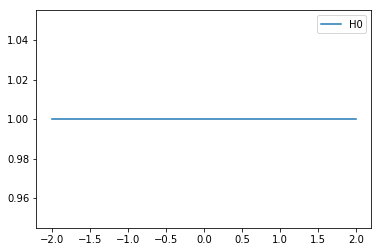

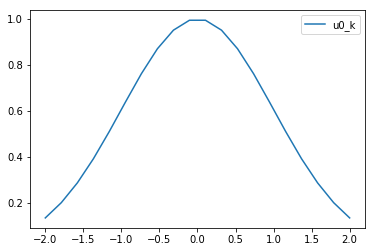

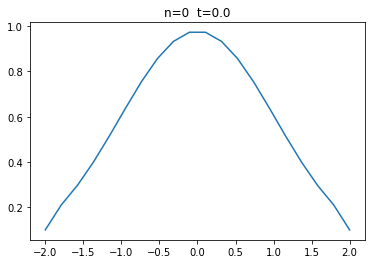

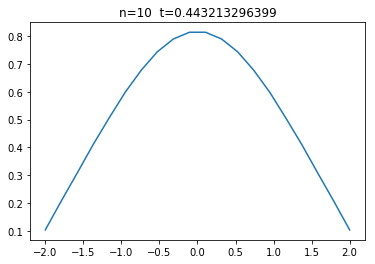

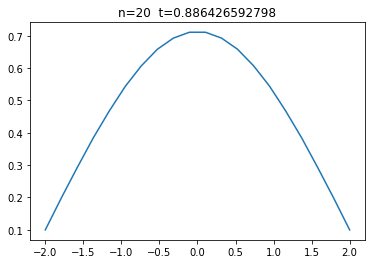

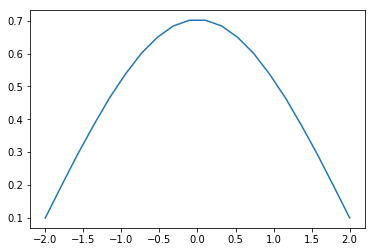

In [7]:
lim_x=2.
x=np.linspace(-lim_x,lim_x,20)
T=1.
E=1.

H0=H(0)

plt.plot(x,H0(x),label='H0')
plt.legend()
plt.show()

u0_T=solve_on_decomp_basis(H0, T, E, x, verbose=2)

plt.plot(x,u0_T,label='u0_T')
plt.show()

## Visualisation des décompositions

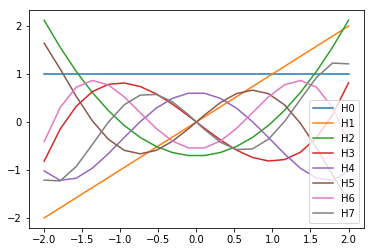

In [8]:
lim_x=2.
x=np.linspace(-lim_x,lim_x,20)
T=1.
E=1.

N=8

y=np.linspace(-50.,50.,5000)
dy=(y[-1]-y[0])/(y.shape[0]-1)

u0=np.zeros(x.shape)

for k in range(N):
    Hk=H(k)
    
    plt.plot(x,Hk(x),label='H'+str(k))
plt.legend()
plt.show()

## Test de reconstruction de u0

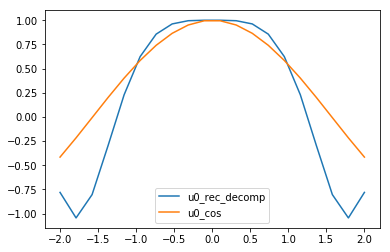

In [9]:
lim_x=2.
x=np.linspace(-lim_x,lim_x,20)
T=1.
E=1.

N=10

y=np.linspace(-50.,50.,5000)
dy=(y[-1]-y[0])/(y.shape[0]-1)

u0=np.zeros(x.shape)

for k in range(N):
    Hk=H(k)
    uk0=proj_uk0(Hk, x)
    u0+=uk0*Hk(x)

plt.plot(x,u0,label='u0_rec_decomp')
plt.plot(x,np.cos(E*x),label='u0_cos')
plt.legend()
plt.show()

### Test de reconstruction de u0 en moyenne

In [10]:
lim_x=2.
x=np.linspace(-lim_x,lim_x,20)
T=1.

y=np.linspace(-50.,50.,5000)
dy=(y[-1]-y[0])/(y.shape[0]-1)

N=3

Nsimul=100

list_E=np.random.normal(size=Nsimul)

list_u0_rec=np.zeros(x.shape[0])

list_u0_th_moy=np.zeros((Nsimul,x.shape[0]))

for nsimul,E in enumerate(list_E):
    u0=np.zeros(x.shape)
    for k in range(N):
        Hk=H(k)
        uk0=proj_uk0(Hk, x)
        u0+=uk0*Hk(x)
    list_u0_rec+=np.copy(u0)
    list_u0_th_moy[nsimul,:]=np.cos(E*x)
    if nsimul%(10)==0:
        print('nsimul=',nsimul)
list_u0_rec/=Nsimul

nsimul= 0
nsimul= 10
nsimul= 20
nsimul= 30
nsimul= 40
nsimul= 50
nsimul= 60
nsimul= 70
nsimul= 80
nsimul= 90


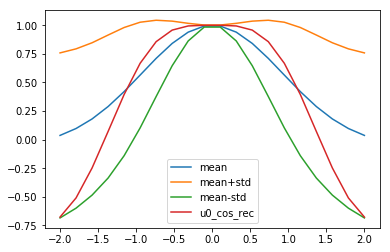

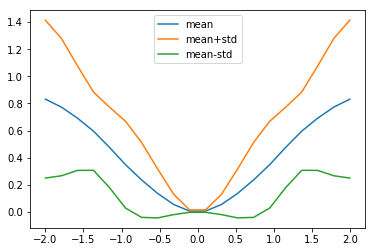

In [11]:
mean_u0=np.sum(list_u0_th_moy,axis=0)/list_u0_th_moy.shape[0]
std_u0=np.sqrt(np.sum((list_u0_th_moy-mean_u0)**2./list_u0_th_moy.shape[0],axis=0))

plt.plot(x,mean_u0,label='mean')
plt.plot(x,mean_u0+std_u0,label='mean+std')
plt.plot(x,mean_u0-std_u0,label='mean-std')
plt.plot(x,list_u0_rec,label='u0_cos_rec')
plt.legend()
plt.show()


#####################
diff=np.abs(list_u0_rec-list_u0_th_moy)

mean_diff=np.sum(diff,axis=0)/diff.shape[0]
std_diff=np.sqrt(np.sum((diff-mean_diff)**2./diff.shape[0],axis=0))

plt.plot(x,mean_diff,label='mean')
plt.plot(x,mean_diff+std_diff,label='mean+std')
plt.plot(x,mean_diff-std_diff,label='mean-std')
plt.legend()
plt.show()

N= 1
N= 5
N= 8
N= 12


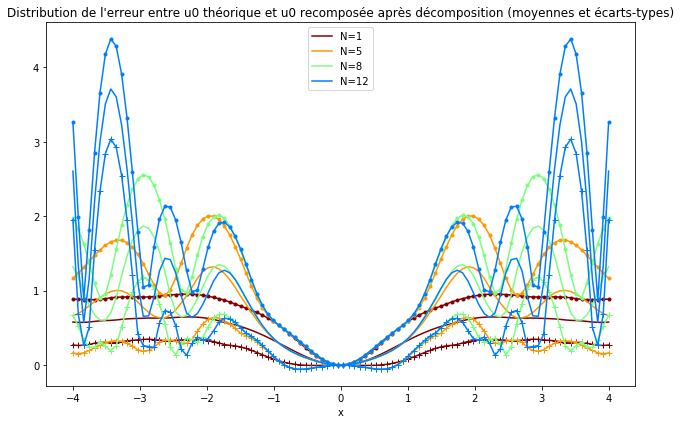

In [12]:
plt.figure(figsize=(10,6))
cmap=plt.get_cmap('jet_r')

lim_x=4.
x=np.linspace(-lim_x,lim_x,100)
T=1.

y=np.linspace(-50.,50.,5000)
dy=(y[-1]-y[0])/(y.shape[0]-1)

Nsimul=100
list_E=np.random.normal(size=Nsimul)

list_N=[1,5,8,12]

for l,N in enumerate(list_N):
    print('N=',N)
    list_u0_rec=np.zeros(x.shape[0])
    list_u0_th_moy=np.zeros((Nsimul,x.shape[0]))
    for nsimul,E in enumerate(list_E):
        u0=np.zeros(x.shape)
        for k in range(N):
            Hk=H(k)
            uk0=proj_uk0(Hk, x)
            u0+=uk0*Hk(x)
        list_u0_rec+=np.copy(u0)
        list_u0_th_moy[nsimul,:]=np.cos(E*x)
    list_u0_rec/=Nsimul
    
    diff=np.abs(list_u0_rec-list_u0_th_moy)

    mean_diff=np.sum(diff,axis=0)/diff.shape[0]
    std_diff=np.sqrt(np.sum((diff-mean_diff)**2./diff.shape[0],axis=0))

    plt.plot(x,mean_diff,color=cmap(float(l)/len(list_N)),label='N='+str(N))
    plt.plot(x,mean_diff+std_diff,color=cmap(float(l)/len(list_N)),marker='.')
    plt.plot(x,mean_diff-std_diff,color=cmap(float(l)/len(list_N)),marker='+')
plt.legend()
plt.xlabel('x')
plt.title("Distribution de l'erreur entre u0 théorique et u0 recomposée après décomposition (moyennes et écarts-types)")
plt.tight_layout()
#plt.savefig('u0_rec_fct_N.png',dpi=300)
plt.show()

## Test de la décomposition pour une valeur de $E$

#### Décomposition

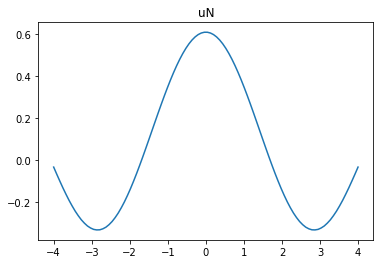

In [13]:
lim_x=4.
x=np.linspace(-lim_x,lim_x,100)
T=1.
E=1.

N=12

y=np.linspace(-50.,50.,5000)
dy=(y[-1]-y[0])/(y.shape[0]-1)

uN=np.zeros(x.shape)

for k in range(N):
    Hk=H(k)
    uk_T = solve_on_decomp_basis(Hk, T, E, x)
    uN+=uk_T*Hk(E)

plt.plot(x,uN,label='uN')
plt.title('uN')
plt.show()

#### Théorie

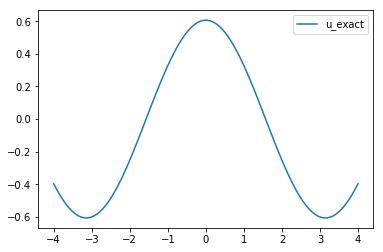

In [14]:
u_exact=np.zeros(x.shape)
for i,xi in enumerate(x):
    u_exact[i]=(1./np.sqrt(2.*np.pi*T))*np.sum(np.exp(-(xi-y)**2./(2.*T))*np.cos(E*y))*dy
plt.plot(x,u_exact,label='u_exact')
plt.legend()
plt.show()

#### Comparaison

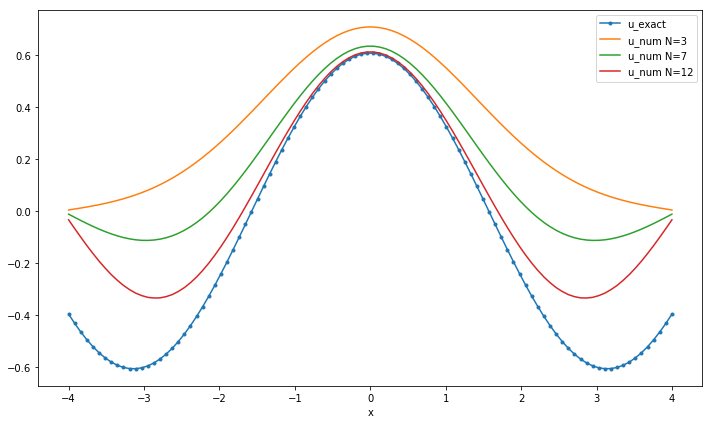

In [15]:
lim_x=4.
x=np.linspace(-lim_x,lim_x,100)
T=1.
E=1.

y=np.linspace(-50.,50.,5000)
dy=(y[-1]-y[0])/(y.shape[0]-1)

list_N=[3,7,12]

plt.figure(figsize=(10,6))

u_exact=np.zeros(x.shape)
for i,xi in enumerate(x):
    u_exact[i]=(1./np.sqrt(2.*np.pi*T))*np.sum(np.exp(-(xi-y)**2./(2.*T))*np.cos(E*y))*dy
plt.plot(x,u_exact,marker='.',label='u_exact')

for l,N in enumerate(list_N):
    uN=np.zeros(x.shape)

    for k in range(N):
        Hk=H(k)
        uk_T = solve_on_decomp_basis(Hk, T, E, x)
        uN+=uk_T*Hk(E)

    plt.plot(x,uN,label='u_num N='+str(N))

plt.xlabel('x')
plt.legend()
plt.tight_layout()
#plt.savefig('illustration_cas_test_num_exact.png',dpi=300)
plt.show()

# Simulations

In [16]:
lim_x=4.
x=np.linspace(-lim_x,lim_x,100)
T=1.

y=np.linspace(-20.,20.,500)
dy=(y[-1]-y[0])/(y.shape[0]-1)

Nsimul=1000

list_E=np.random.normal(size=Nsimul)

list_N=[1,5,8,12]

list_moy_list_uT=[]
list_std_list_uT=[]
list_moy_list_uexact=[]
list_std_list_uexact=[]

list_mean_diff=[]
list_std_diff=[]

for l,N in enumerate(list_N):
    print('N=',N)
    
    list_E=np.random.normal(size=Nsimul)
    list_uT=np.zeros((Nsimul,x.shape[0]))
    list_uexact=np.zeros((Nsimul,x.shape[0]))


    for nsimul in range(Nsimul):
        E=list_E[nsimul]
        uN=np.zeros(x.shape)
        for k in range(N):
            Hk=H(k)
            uk_T = solve_on_decomp_basis(Hk, T, E, x)
            uN+=uk_T*Hk(E)
        list_uT[nsimul,:]=np.copy(uN)

        u_exact=np.zeros(x.shape)
        for i,xi in enumerate(x):
            u_exact[i]=(1./np.sqrt(2.*np.pi*T))*np.sum(np.exp(-(xi-y)**2./(2.*T))*np.cos(E*y))*dy
        list_uexact[nsimul,:]=np.copy(u_exact)

        if nsimul%(50)==0:
            print('nsimul=',nsimul)
            
    moy_list_uT=np.sum(list_uT,axis=0)/list_uT.shape[0]
    std_list_uT=np.sqrt(np.sum((list_uT-moy_list_uT)**2./list_uT.shape[0],axis=0))

    moy_list_uexact=np.sum(list_uexact,axis=0)/list_uexact.shape[0]
    std_list_uexact=np.sqrt(np.sum((list_uexact-moy_list_uexact)**2./list_uexact.shape[0],axis=0))

    list_moy_list_uT.append(moy_list_uT)
    list_std_list_uT.append(std_list_uT)
    list_moy_list_uexact.append(moy_list_uexact)
    list_std_list_uexact.append(std_list_uexact)
    
    diff=np.abs(list_uT-list_uexact)

    mean_diff=np.sum(diff,axis=0)/diff.shape[0]
    std_diff=np.sqrt(np.sum((diff-mean_diff)**2./diff.shape[0],axis=0))

    list_mean_diff.append(mean_diff)
    list_std_diff.append(std_diff)

N= 1
nsimul= 0
nsimul= 50
nsimul= 100
nsimul= 150
nsimul= 200
nsimul= 250
nsimul= 300
nsimul= 350
nsimul= 400
nsimul= 450
nsimul= 500
nsimul= 550
nsimul= 600
nsimul= 650
nsimul= 700
nsimul= 750
nsimul= 800
nsimul= 850
nsimul= 900
nsimul= 950
N= 5
nsimul= 0
nsimul= 50
nsimul= 100
nsimul= 150
nsimul= 200
nsimul= 250
nsimul= 300
nsimul= 350
nsimul= 400
nsimul= 450
nsimul= 500
nsimul= 550
nsimul= 600
nsimul= 650
nsimul= 700
nsimul= 750
nsimul= 800
nsimul= 850
nsimul= 900
nsimul= 950
N= 8
nsimul= 0
nsimul= 50
nsimul= 100
nsimul= 150
nsimul= 200
nsimul= 250
nsimul= 300
nsimul= 350
nsimul= 400
nsimul= 450
nsimul= 500
nsimul= 550
nsimul= 600
nsimul= 650
nsimul= 700
nsimul= 750
nsimul= 800
nsimul= 850
nsimul= 900
nsimul= 950
N= 12
nsimul= 0
nsimul= 50
nsimul= 100
nsimul= 150
nsimul= 200
nsimul= 250
nsimul= 300
nsimul= 350
nsimul= 400
nsimul= 450
nsimul= 500
nsimul= 550
nsimul= 600
nsimul= 650
nsimul= 700
nsimul= 750
nsimul= 800
nsimul= 850
nsimul= 900
nsimul= 950


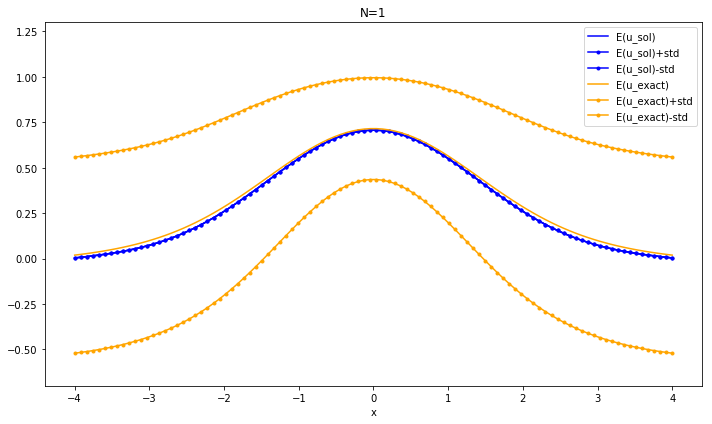

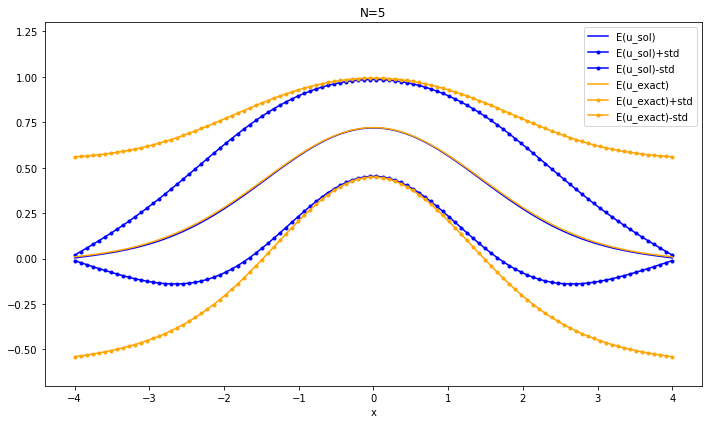

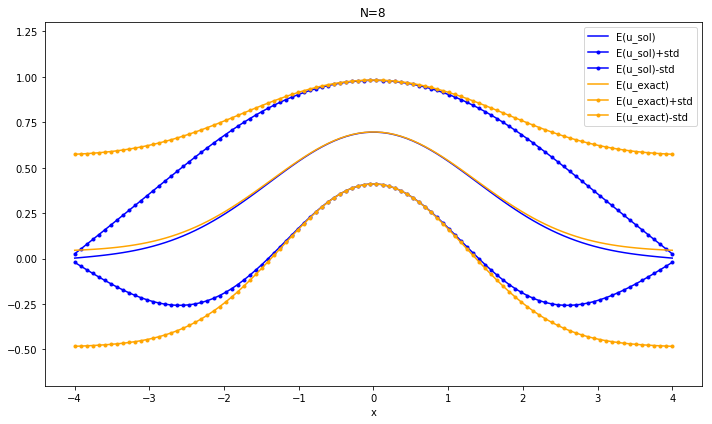

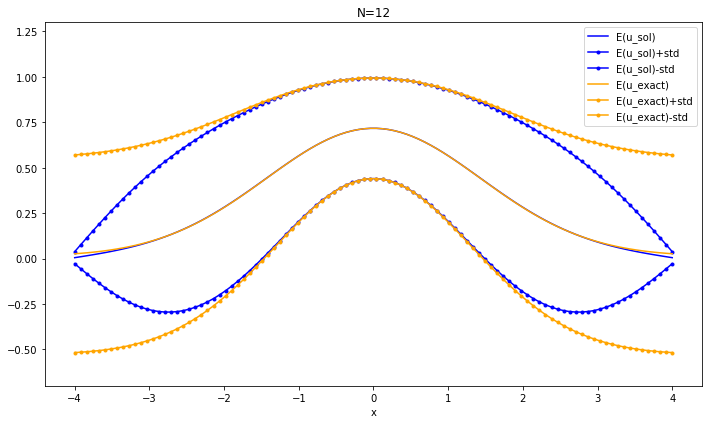

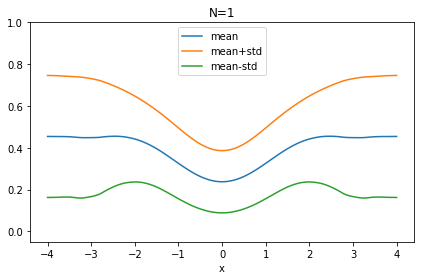

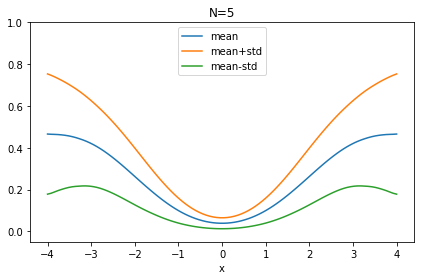

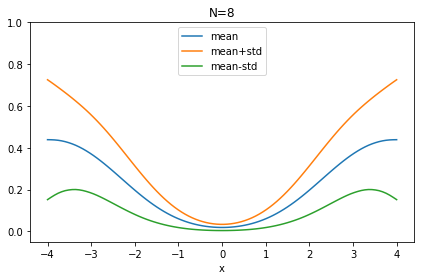

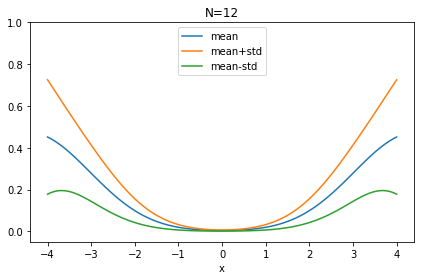

In [17]:
for i in range(len(list_N)):
    N=list_N[i]
    moy_list_uT=list_moy_list_uT[i]
    std_list_uT=list_std_list_uT[i]
    moy_list_uexact=list_moy_list_uexact[i]
    std_list_uexact=list_std_list_uexact[i]

    plt.figure(figsize=(10,6))
    plt.plot(x,moy_list_uT,color='blue',label='E(u_sol)')
    plt.plot(x,moy_list_uT+std_list_uT,color='blue',marker='.',label='E(u_sol)+std')
    plt.plot(x,moy_list_uT-std_list_uT,color='blue',marker='.',label='E(u_sol)-std')
    plt.plot(x,moy_list_uexact,color='orange',label='E(u_exact)')
    plt.plot(x,moy_list_uexact+std_list_uexact,color='orange',marker='.',label='E(u_exact)+std')
    plt.plot(x,moy_list_uexact-std_list_uexact,color='orange',marker='.',label='E(u_exact)-std')
    plt.ylim(-0.7,1.3)
    plt.xlabel('x')
    plt.title('N='+str(N))
    plt.legend()
    plt.tight_layout()
    #plt.savefig('distrib_emp_th_N='+str(N)+'.png',dpi=300)
    plt.show()

    
for i in range(len(list_N)):
    N=list_N[i]
    mean_diff=list_mean_diff[i]
    std_diff=list_std_diff[i]
    plt.plot(x,mean_diff,label='mean')
    plt.plot(x,mean_diff+std_diff,label='mean+std')
    plt.plot(x,mean_diff-std_diff,label='mean-std')
    plt.ylim(-0.05,1.)
    plt.xlabel('x')
    plt.title('N='+str(N))
    plt.legend(loc=9)
    plt.tight_layout()
    #plt.savefig('distrib_diff_N='+str(N)+'.png',dpi=300)
    plt.show()